In [162]:
from tensorflow.keras.layers import Dense, Input,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

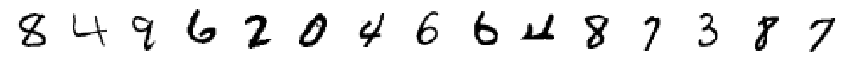

In [21]:
N=15
plt.figure(figsize=(15,2))
for i in range(N):
    plt.subplot(1,N,i+1)
    plt.imshow(255-x_train[np.random.randint(len(x_train))],cmap='gray')
    plt.axis('off')

In [3]:
train_reshape=x_train.reshape(len(x_train),28*28)/255.
test_reshape=x_test.reshape(len(x_test),28*28)/255.

In [65]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(28*28,activation='sigmoid'))

In [66]:
model.compile(optimizer='adam',loss='mse')#,metrics=['accuracy'])

In [67]:
model.fit(train_reshape,train_reshape,epochs=3,validation_data=(test_reshape,test_reshape))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0328 - val_loss: 0.0171
Epoch 2/3
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0144 - val_loss: 0.0121
Epoch 3/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0120 - val_loss: 0.0113


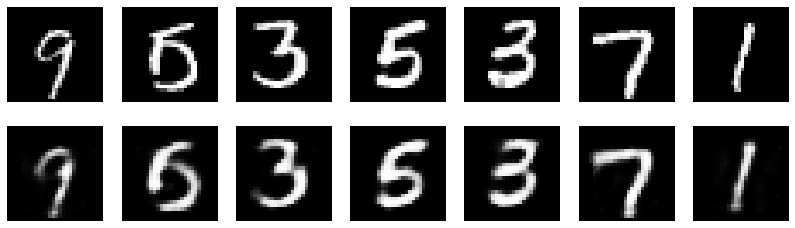

In [33]:
N=7
plt.figure(figsize=(14,4))
for i in range(1,N+1):
    k=np.random.randint(len(x_test))
    plt.subplot(2,N,i)
    plt.imshow(x_test[k],cmap='gray')
    plt.axis('off')
    plt.subplot(2,N,N+i)
    plt.imshow(255*model.predict(test_reshape[k:k+1])[0].reshape(28,28),cmap='gray')
    plt.axis('off')

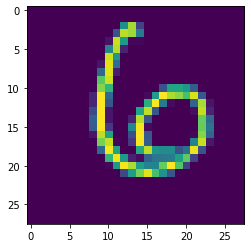

In [38]:
N=15
plt.figure(figsize=(15,2))
for i in range(N):
    plt.subplot(1,N,i+1)
    plt.imshow(255-x_train[np.random.randint(len(x_train))],cmap='gray')
    plt.axis('off')

In [35]:
W=model.get_weights()

# USING MODEL

In [151]:
dim=50
x=Input(28*28)
enc=Dense(dim,activation='relu')(x)
dec=Dense(28*28,activation='sigmoid')(enc)

In [152]:
ae=Model(x,dec)

In [153]:
ae.compile(optimizer='adam',loss='mse')#,metrics=['accuracy'])

In [154]:
ae.fit(train_reshape,train_reshape,epochs=3,validation_data=(test_reshape,test_reshape))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0262 - val_loss: 0.0110
Epoch 2/3
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0085 - val_loss: 0.0068
Epoch 3/3
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0065 - val_loss: 0.0061


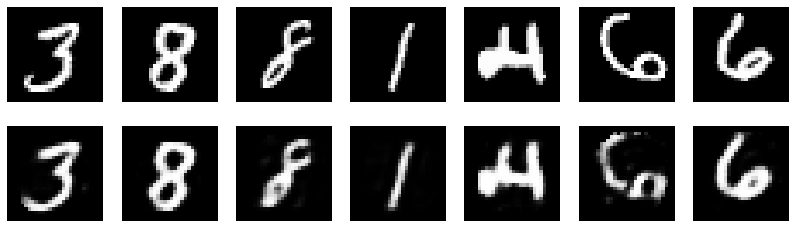

In [157]:
N=7
plt.figure(figsize=(14,4))
for i in range(1,N+1):
    k=np.random.randint(len(x_test))
    plt.subplot(2,N,i)
    plt.imshow(x_test[k],cmap='gray')
    plt.axis('off')
    plt.subplot(2,N,N+i)
    plt.imshow(255*ae.predict(test_reshape[k:k+1])[0].reshape(28,28),cmap='gray')
    plt.axis('off')

In [158]:
en=Model(x,enc)

In [159]:
comp=en.predict(test_reshape)

In [160]:
mypca=PCA(2)

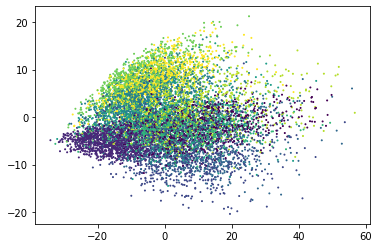

In [161]:
data=mypca.fit_transform(comp)
plt.scatter(data[:,0],data[:,1],s=1,c=y_test)

In [164]:
mytsne=TSNE(2)

In [185]:
S_EMB=2000
emb=mytsne.fit_transform(X=comp[:S_EMB])

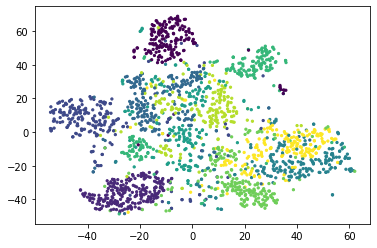

In [186]:
plt.scatter(emb[:,0],emb[:,1],s=5,c=y_test[:S_EMB])

In [127]:
codes=en.predict(test_reshape[100:102])

In [126]:
inp=Input(dim)
dc=Model(inp,ae.layers[-1](inp))

In [129]:
res=dc.predict(codes)

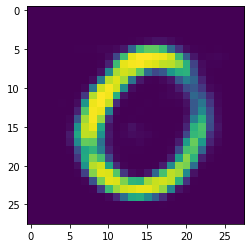

In [134]:
plt.imshow(res[1].reshape(28,28))

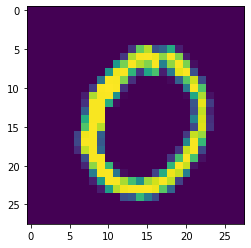

In [133]:
plt.imshow(x_test[101])

In [149]:
alaki=dc.predict(avgr)

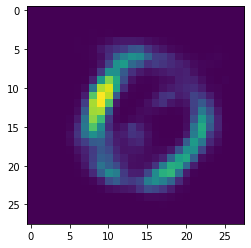

In [150]:
plt.imshow(alaki.reshape(28,28))

In [139]:
codes[1]

array([ 6.5609794,  9.476105 ,  6.4905157,  6.0597477, 10.580815 ,
        5.550518 ,  4.623148 ,  5.3244724,  6.2826395, 18.608482 ,
        2.9015064,  3.3284378, 12.412781 ,  0.9782857,  4.4731083,
       10.514617 , 11.103722 ,  6.0237255, 13.619518 , 16.292603 ,
        6.4080133,  3.2114656,  7.737941 ,  7.764087 ,  4.719372 ,
        2.2411249, 19.421856 ,  7.0465713,  7.323719 ,  2.083591 ],
      dtype=float32)

In [144]:
avg=(codes[0]+codes[1])/2

In [143]:
codes.shape

(2, 30)

In [147]:
avg.shape

(30,)

In [148]:
avgr=avg.reshape(1,30)

In [ ]:
av